# Assignment 1.3

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [2]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ----- ---------------------------------- 5.0/39.5 MB 27.2 MB/s eta 0:00:02
   ---------- ----------------------------- 10.7/39.5 MB 26.8 MB/s eta 0:00:02
   ----------------- ---------------------- 17.0/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ----------------- ---------------------- 17.3/39.5 MB 28.1 MB/s eta 0:00:01
   ------------------ --------------------- 18.6/39.5 MB 8.3 MB/s eta 0:00:03
   ----------------------- ---------------- 23.1/39.5 MB 9.1 MB


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Set up python path 
import sys
import os
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt
from io import StringIO
from PIL import Image
import IPython

def show_image(data): 
    IPython.display.display(Image.fromarray(data))

## Load image

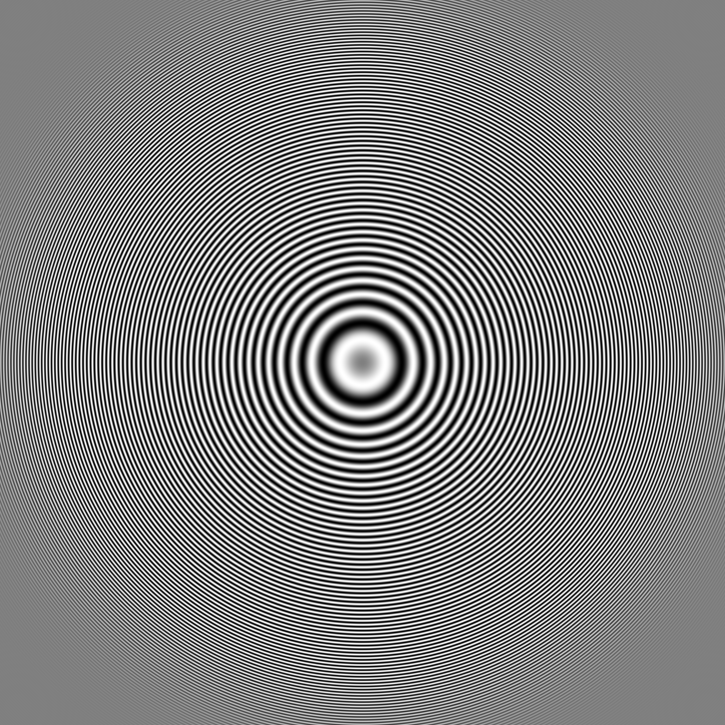

In [4]:
image = cv.imread("test_pattern.png")
show_image(image)

## Q1: Downsample the image with plain area downsampling

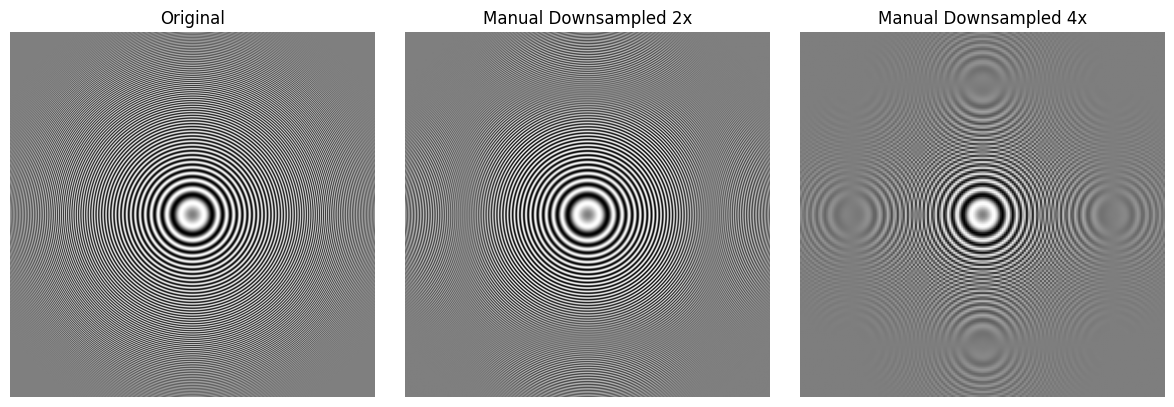

In [7]:
# You may use opencv 
# Downsample by a factor of 2 and visualize 
# Downsample by a factor of 4 and visualize
# 1 Point 

def manual_downsample_area(img, factor):

    h, w = img.shape
    new_h, new_w = h // factor, w // factor
    downsampled = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            block = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
            avg = np.mean(block)
            downsampled[i, j] = int(avg)

    return downsampled

# Load grayscale image
image = cv.imread("test_pattern.png", cv.IMREAD_GRAYSCALE)

# Apply manual downsampling
manual_2x = manual_downsample_area(image, 2)
manual_4x = manual_downsample_area(image, 4)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(manual_2x, cmap='gray')
axs[1].set_title('Manual Downsampled 2x')
axs[1].axis('off')

axs[2].imshow(manual_4x, cmap='gray')
axs[2].set_title('Manual Downsampled 4x')
axs[2].axis('off')

plt.tight_layout()
plt.show()


Please provide a detailed explanation of what you see here and what the reasons for the effect are (2 Points)

I can observe In downsampling 4X that the pattern of 4 circles around is more visible because of spacial aliasing effect where downsampling wihtout first reducign the high frequency areas, the pixel grid misinterprets the ring pattern.The outer ring of the original image is tighter with high spacial frequency as the white and black pixels change frequently. During the 4X downsampling we are skipping 16 original pixels 4X4 to make a new pixel, so the system cant distinguish tight ring spaces causing the reconstruction to be incorrect as shown from wider patterns. This apporach uses the mean of surounding pixels but its bad when the kernal box we are having has one exponentially high value inside its box compared to its neigbouring box which has small value, causing the diffrence to be high when downsampling.

## Q2: Implement smoothing for antialiasing and then downsample

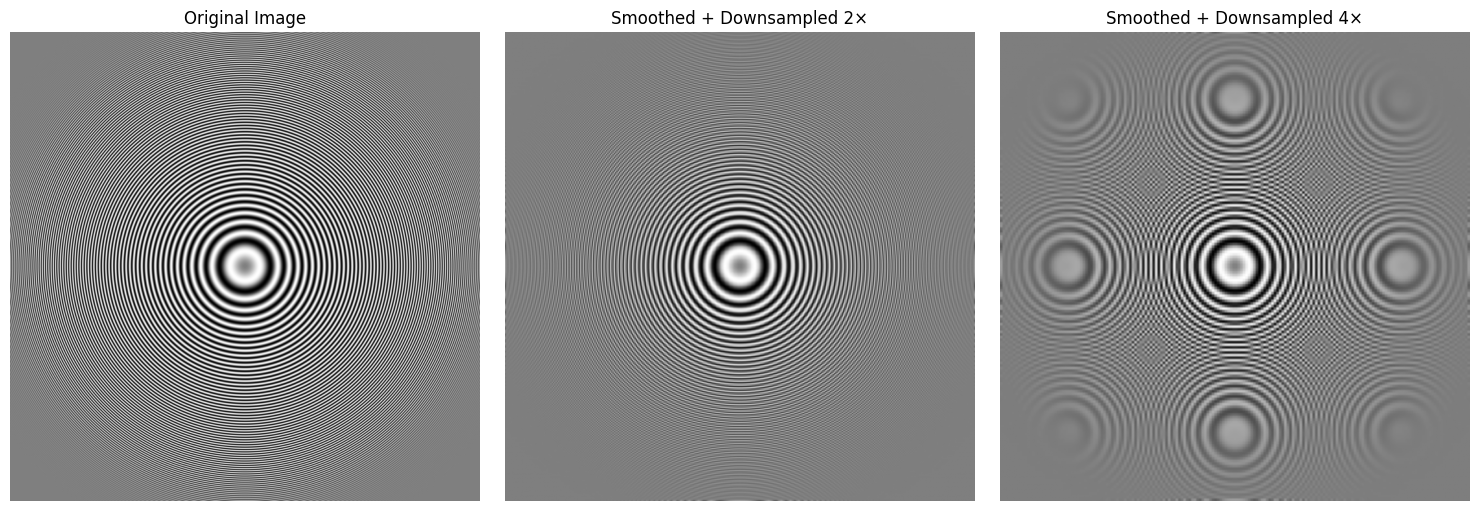

In [ ]:
# Note that determining the exact filter requires complex signal theory 
# You may use a Gaussian here instead
# Show downsampled images by factors 2 and 4
# 1 Point

from scipy.ndimage import gaussian_filter

def smooth_and_downsample(img, factor, sigma=1.0):

    # Step 1: Apply Gaussian filter for anti-aliasing
    smoothed = gaussian_filter(img, sigma=sigma)

    # Step 2: Downsample by taking every 'factor'th pixel
    downsampled = smoothed[::factor, ::factor]
    return downsampled

# Load image in grayscale
image = cv.imread("test_pattern.png", cv.IMREAD_GRAYSCALE)

# Apply smoothing and downsampling
downsample_2x = smooth_and_downsample(image, 2, sigma=1.0)
downsample_4x = smooth_and_downsample(image, 4, sigma=1.0)

# Display original and downsampled results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(downsample_2x, cmap='gray')
axs[1].set_title("Smoothed + Downsampled 2×")
axs[1].axis('off')

axs[2].imshow(downsample_4x, cmap='gray')
axs[2].set_title("Smoothed + Downsampled 4×")
axs[2].axis('off')

plt.tight_layout()
plt.show()
